In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import join
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import glob


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))


Num GPUs Available:  1


In [3]:
import tensorflow as tf
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Clases:
- 0 : Normal.
- 1 : Falla en la pista interna.
- 2 : Falla pista externa.
- 3 : Falla en bola rodamiento.
- 4 : Falla combinada.

In [4]:
#Crear una función que divida en datos de entrenamiento y test las imagenes.

## Lectura de imágenes como arrays y creación de targets en base a etiquetas.

In [5]:
def prepros_bancoimagenes(mydir, test_size, val_size):
    #Lectura en array de imagenes, preprocesamiento a grises y reescalamiento a 128x128
    X = [] 
    for name in listdir(mydir) :
        path = join( mydir,name) 
        data = Image.open(path).convert('L')
        data = data.resize((128,128))
        data = np.array(data)
        X.append(data) 
    X = np.array(X) 
    print(X.shape) 

    y =[]
    for name in listdir(mydir) :
        path = join( mydir,name) 
        if name[0] == 'H':
            y.append(0)
        if name[0] == 'I':
            y.append(1)
        if name[0] == 'O':
            y.append(2)
        if name[0] == 'B':
            y.append(3)
        if name[0] == 'C':
            y.append(4)
    y = np.array(y) 
    print(y.shape) 
    
    # Dividir datos de test y entrenamiento.
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    
    #Dividir los datos de train en entrenamiento y validación.
    x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=42, stratify = y_train)
    
    #Normalización
    x_train = x_train.astype("float32") / 255
    x_val= x_val.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    
    #Agregar dimensión extra
    x_train = np.expand_dims(x_train, -1) 
    x_val = np.expand_dims(x_val, -1) 
    x_test = np.expand_dims(x_test, -1) 
    
    #One hot encoder
    y_train = keras.utils.to_categorical(y_train, 5)
    y_val = keras.utils.to_categorical(y_val, 5)
    y_test = keras.utils.to_categorical(y_test, 5)

    return x_train, x_test, x_val, y_train, y_test, y_val

## Lectura de imágenes como arrays y creación de targets en base a etiquetas.

In [6]:
#Directorios de bancos de imagenes



mydir_1 = r"BANCOS/grey/16384/10giros/Banco_GLOBAL_COLOR"
mydir_2 = r"BANCOS/grey/16384/10giros/Banco_LOCAL_COLOR" 
mydir_3 = r"BANCOS/grey/16384/10giros/Banco_SENAL_COLOR" 


test_size = 0.2
val_size = 0.1

In [7]:
#Datos
x_train_1, x_test_1, x_val_1, y_train_1, y_test_1, y_val_1 = prepros_bancoimagenes(mydir_1, test_size, val_size)
x_train_2, x_test_2, x_val_2, y_train_2, y_test_2, y_val_2 = prepros_bancoimagenes(mydir_2, test_size, val_size)
x_train_3, x_test_3, x_val_3, y_train_3, y_test_3, y_val_3 = prepros_bancoimagenes(mydir_3, test_size, val_size)


(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)
(1086, 128, 128)
(1086,)


In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import join
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import glob

### Calcular promedios

In [9]:

#Calcular promedio de cada modelo
def calcular_promedio_porcentaje(nombre_base):
    archivos_csv = glob.glob(os.path.join('resultados-cnn/history', nombre_base + '*.csv'))
    promedio_accuracy = 0
    promedio_val_accuracy = 0
    accuracy_lista = []
    val_accuracy_lista = []
    for archivo in archivos_csv:
        df = pd.read_csv(archivo)
        ultimo_index = df.index[-1]
        #Encuentra el ultimo valor en la epoch 10 y los suma para luego dividir por la cantidad de archivos presentes.
        promedio_accuracy += df.loc[ultimo_index, 'accuracy']
        promedio_val_accuracy += df.loc[ultimo_index, 'val_accuracy']
        #Agregar accuracy de prom y val a las listas para determinar el mejor modelo.
        accuracy_lista.append(df.loc[ultimo_index, 'accuracy'])
        val_accuracy_lista.append(df.loc[ultimo_index, 'val_accuracy'])

    promedio_accuracy = promedio_accuracy / len(archivos_csv)
    promedio_val_accuracy = promedio_val_accuracy / len(archivos_csv)

    promedio_val_accuracy = promedio_val_accuracy * 100
    promedio_accuracy = promedio_accuracy * 100

    return promedio_accuracy, promedio_val_accuracy, accuracy_lista ,val_accuracy_lista 

In [21]:
accuracy_train_1, val_train_1, ac_lista_1, val_lista_1 = calcular_promedio_porcentaje('GLOBAL-1seg-16384_iter')
accuracy_train_2, val_train_2, ac_lista_2, val_lista_2 = calcular_promedio_porcentaje('LOCAL-1seg-16384_iter')
accuracy_train_3, val_train_3, ac_lista_3, val_lista_3 = calcular_promedio_porcentaje('SENAL-1seg-16384_iter')

accuracy_train_4, val_train_4,ac_lista_4, val_lista_4 = calcular_promedio_porcentaje('GLOBAL-10giros-16384_iter')
accuracy_train_5, val_train_5, ac_lista_5, val_lista_5 = calcular_promedio_porcentaje('LOCAL-10giros-16384_iter')
accuracy_train_6, val_train_6, ac_lista_6, val_lista_6= calcular_promedio_porcentaje('SENAL-10giros-16384_iter')

accuracy_train_7, val_train_7, ac_lista_7, val_lista_7 = calcular_promedio_porcentaje('GLOBAL-0,6seg-16384_iter')
accuracy_train_8, val_train_8, ac_lista_8, val_lista_8 = calcular_promedio_porcentaje('LOCAL-0,6seg-16384_iter')
accuracy_train_9, val_train_9, ac_lista_9, val_lista_9 = calcular_promedio_porcentaje('SENAL-0,6seg-16384_iter')


In [22]:
#Encontrar mejor modelo
def encontrar_maximo(lista):
    maximo = max(lista)
    posicion = lista.index(maximo)
    return maximo, posicion

In [23]:
#Mejores accuracys
max_1, pos_1 = encontrar_maximo(ac_lista_1)
print('STFT - GLOBAL - 1 SEG ---- Maximo: ', max_1, 'en iteración:', pos_1)

max_2, pos_2 = encontrar_maximo(ac_lista_2)
print('STFT - LOCAL - 1 SEG ---- Maximo: ', max_2, 'en iteración:', pos_2)

max_3, pos_3 = encontrar_maximo(ac_lista_3)
print('STFT - SENAL - 1 SEG ---- Maximo: ', max_3, 'en iteración:', pos_3)

max_4, pos_4 = encontrar_maximo(ac_lista_4)
print('STFT - GLOBAL - 10GIROS ---- Maximo: ', max_4, 'en iteración:', pos_4)

max_5, pos_5 = encontrar_maximo(ac_lista_5)
print('STFT - LOCAL - 10GIROS ---- Maximo: ', max_5, 'en iteración:', pos_5)

max_6, pos_6 = encontrar_maximo(ac_lista_6)
print('STFT - SENAL - 10GIROS ---- Maximo: ', max_6, 'en iteración:', pos_6)

max_7, pos_7 = encontrar_maximo(ac_lista_7)
print('STFT - GLOBAL - 0,6 SEG ---- Maximo: ', max_7, 'en iteración:', pos_7)

max_8, pos_8 = encontrar_maximo(ac_lista_8)
print('STFT - LOCAL - 0,6 SEG ---- Maximo: ', max_8, 'en iteración:', pos_8)

max_9, pos_9 = encontrar_maximo(ac_lista_9)
print('STFT - SENAL - 0,6 SEG ---- Maximo: ', max_9, 'en iteración:', pos_9)


STFT - GLOBAL - 1 SEG ---- Maximo:  0.7122641801834106 en iteración: 9
STFT - LOCAL - 1 SEG ---- Maximo:  0.9669811129570008 en iteración: 3
STFT - SENAL - 1 SEG ---- Maximo:  0.9504716992378236 en iteración: 8
STFT - GLOBAL - 10GIROS ---- Maximo:  0.8629961609840393 en iteración: 4
STFT - LOCAL - 10GIROS ---- Maximo:  1.0 en iteración: 8
STFT - SENAL - 10GIROS ---- Maximo:  0.9974392056465148 en iteración: 2
STFT - GLOBAL - 0,6 SEG ---- Maximo:  0.8865979313850403 en iteración: 2
STFT - LOCAL - 0,6 SEG ---- Maximo:  0.9985272288322448 en iteración: 0
STFT - SENAL - 0,6 SEG ---- Maximo:  0.983799695968628 en iteración: 4


In [24]:
#Valores promediados de entrenar 10 veces la CNN con epochs 10 y batch 32
print('STFT - GLOBAL - 1 SEG | Accuracy 1:', accuracy_train_1, 'Val Accuracy 1:', val_train_1)
print('STFT - LOCAL - 1 SEG | Accuracy 2:', accuracy_train_2, 'Val Accuracy 2:', val_train_2)
print('STFT - SENAL - 1 SEG | Accuracy 3:', accuracy_train_3, 'Val Accuracy 3:', val_train_3)

print('STFT - GLOBAL - 10GIROS | Accuracy 4:', accuracy_train_4, 'Val Accuracy 4:', val_train_4)
print('STFT - LOCAL - 10GIROS | Accuracy 5:', accuracy_train_5, 'Val Accuracy 5:', val_train_5)
print('STFT - SENAL - 10GIROS | Accuracy 6:', accuracy_train_6, 'Val Accuracy 6:', val_train_6)

print('STFT - GLOBAL - 0,6 SEG | Accuracy 1:', accuracy_train_7, 'Val Accuracy 1:', val_train_7)
print('STFT - LOCAL - 0,6 SEG | Accuracy 2:', accuracy_train_8, 'Val Accuracy 2:', val_train_8)
print('STFT - SENAL - 0,6 SEG | Accuracy 3:', accuracy_train_9, 'Val Accuracy 3:', val_train_9)

STFT - GLOBAL - 1 SEG | Accuracy 1: 63.79716992378235 Val Accuracy 1: 67.08333253860474
STFT - LOCAL - 1 SEG | Accuracy 2: 94.71698105335236 Val Accuracy 2: 93.95833313465118
STFT - SENAL - 1 SEG | Accuracy 3: 81.53301894664764 Val Accuracy 3: 87.08333432674408
STFT - GLOBAL - 10GIROS | Accuracy 4: 81.38284206390381 Val Accuracy 4: 85.17241358757019
STFT - LOCAL - 10GIROS | Accuracy 5: 99.00128066539764 Val Accuracy 5: 99.08045828342438
STFT - SENAL - 10GIROS | Accuracy 6: 98.73239457607269 Val Accuracy 6: 98.96551668643951
STFT - GLOBAL - 0,6 SEG | Accuracy 1: 79.18998599052429 Val Accuracy 1: 80.13157904148102
STFT - LOCAL - 0,6 SEG | Accuracy 2: 97.74668633937836 Val Accuracy 2: 98.1578940153122
STFT - SENAL - 0,6 SEG | Accuracy 3: 97.11340248584747 Val Accuracy 3: 98.55263113975525


### Resultados 1: Precisión promedio

In [10]:
def plot_precision_promedio(acc_promedio, val_promedio, nombre_modelo, dur_señal):
    barWidth = 0.3
    fig, ax = plt.subplots(figsize=(6, 4))

    br1 = np.arange(len(acc_promedio))
    br2 = [x + barWidth for x in br1]

    plt.bar(br1, acc_promedio, color='r', width=barWidth, edgecolor='grey', label='Entrenamiento')
    plt.bar(br2, val_promedio, color='b', width=barWidth, edgecolor='grey', label='Validación')

    ax.set_title(f'Precisión promedio', fontsize=12)
    ax.set_title(f'Duración señal: ' + dur_señal + ' / epoch = 10 / batch = 32 / iteraciones = 10.', fontsize=10)
    ax.set_ylabel('Precisión promedio %', fontsize=10)
    ax.set_xlabel('Normalización', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    plt.xticks([r + barWidth / 2 for r in range(len(acc_promedio))],
               ['Global', 'Local', 'Señal'], rotation=0, fontsize=9)
    y_max = max(max(acc_promedio), max(val_promedio)) + 20
    plt.ylim([0, y_max])

    # Mover leyenda afuera a la izquierda
    plt.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1.35, 1))

    for i, acc in enumerate(acc_promedio):
        plt.text(x=br1[i] - 0.11, y=acc + 1, s=f"{acc:.1f}%", size=9)
    for i, val in enumerate(val_promedio):
        plt.text(x=br2[i] - 0.11, y=val + 1, s=f"{val:.1f}%", size=9)

    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2) # Ajustar área de trazado

    plt.savefig('resultados-cnn/imagenes/acc_barras/' + nombre_modelo + '_accuracy.png', dpi=300, bbox_inches='tight')

    plt.show()


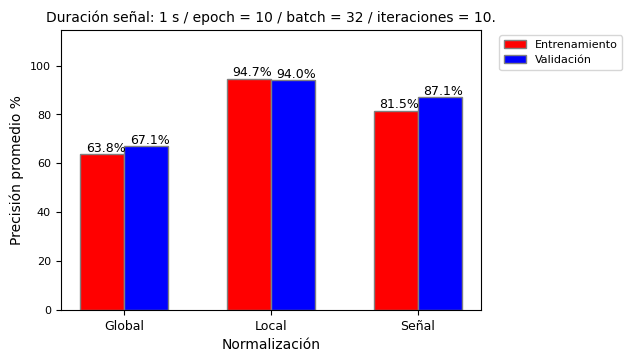

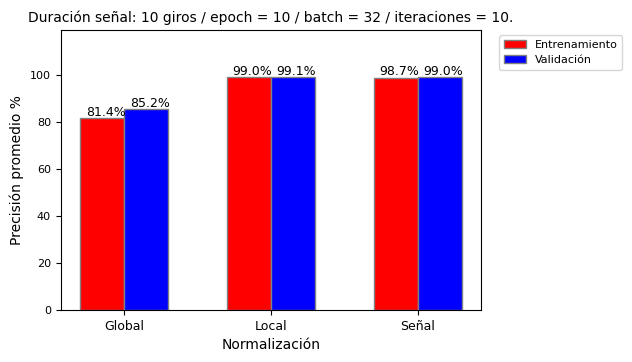

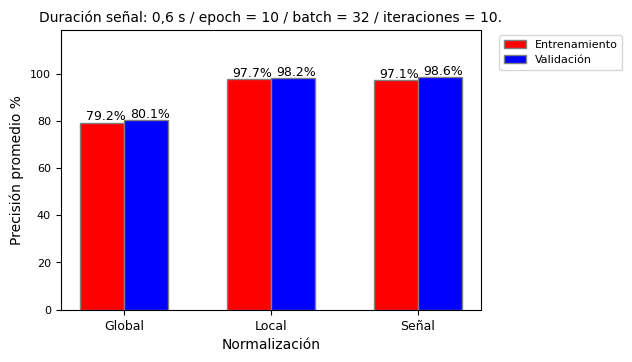

In [102]:
acc_promedio_1 = [accuracy_train_1, accuracy_train_2,accuracy_train_3]
val_promedio_1 = [val_train_1, val_train_2, val_train_3]

acc_promedio_2 = [accuracy_train_4, accuracy_train_5,accuracy_train_6]
val_promedio_2 = [val_train_4, val_train_5, val_train_6]

acc_promedio_3 = [accuracy_train_7, accuracy_train_8,accuracy_train_9]
val_promedio_3 = [val_train_7, val_train_8, val_train_9]

#Plot
plot_precision_promedio(acc_promedio_1, val_promedio_1, dur_señal = '1 s', nombre_modelo='1seg-16384_prom')
plot_precision_promedio(acc_promedio_2, val_promedio_2, dur_señal = '10 giros', nombre_modelo='10giros-16384_prom')
plot_precision_promedio(acc_promedio_3, val_promedio_3, dur_señal = '0,6 s', nombre_modelo='0,6seg-16384_prom')


In [6]:
from tensorflow.keras.models import load_model
def cargar_modelo_y_historial(nombre_modelo):
    carpeta_modelos = "resultados-cnn/models"
    carpeta_history = "resultados-cnn/history"
    
    # Cargar modelo
    ruta_modelo = os.path.join(carpeta_modelos, nombre_modelo + ".h5")
    model = load_model(ruta_modelo)
    
    # Cargar historial
    ruta_historial = os.path.join(carpeta_history, nombre_modelo + ".csv")
    hist = pd.read_csv(ruta_historial)
    
    return model, hist

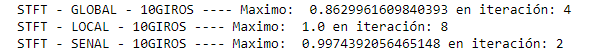

In [7]:
#Mejores modelos
model_1, hist_1 = cargar_modelo_y_historial('GLOBAL-10giros-16384_iter_4')
model_2, hist_2 = cargar_modelo_y_historial('LOCAL-10giros-16384_iter_8')
model_3, hist_3 = cargar_modelo_y_historial('SENAL-10giros-16384_iter_2')

In [1]:
#Función gráfico precision

def grafico_precision_pormodelo(nombre_modelo, ax):
    # Cargar datos del historial
    hist_df = pd.read_csv('resultados-cnn/history/' + nombre_modelo + '.csv')

    # Crear figura y subplots
    ax.plot(hist_df['accuracy'], linewidth=0.5, marker = 'o', mfc = 'w', ms='4', label='Precisión entrenamiento')
    ax.plot(hist_df['val_accuracy'], linewidth=0.5, marker = 's', mfc = 'w', ms='4', label='Precisión de validación')
    ax.legend(loc='lower right', fontsize=10)

    # Ajustar límites del eje x
    ax.set_xlim(0, len(hist_df)-1)

    # Guardar gráfico
    plt.savefig('resultados-cnn/imagenes/accuracy/' + nombre_modelo + '_accuracy.png')


In [2]:
def grafico_perdida_pormodelo(nombre_modelo, ax):
    # Cargar datos del historial
    hist_df = pd.read_csv('resultados-cnn/history/' + nombre_modelo + '.csv')

    # Crear figura y subplots
    ax.plot(hist_df['loss'], linewidth=0.5, marker = 'o', mfc = 'w', ms='4', label='Pérdida entrenamiento')
    ax.plot(hist_df['val_loss'], linewidth=0.5, marker = 's', mfc = 'w', ms='4', label='Pérdida de validación')
    ax.legend(loc='upper right', fontsize=10)

    # Ajustar límites del eje x
    ax.set_xlim(0, len(hist_df)-1)

    # Guardar gráfico
    plt.savefig('resultados-cnn/imagenes/accuracy/' + nombre_modelo + '_perdida.png')

In [187]:
#Plots de accuraccy
grafico_precision_pormodelo('GLOBAL-10giros-16384_iter_4',ax1)
grafico_precision_pormodelo('LOCAL-10giros-16384_iter_8',ax2)
grafico_precision_pormodelo('SENAL-10giros-16384_iter_2',ax3)

<Figure size 640x480 with 0 Axes>

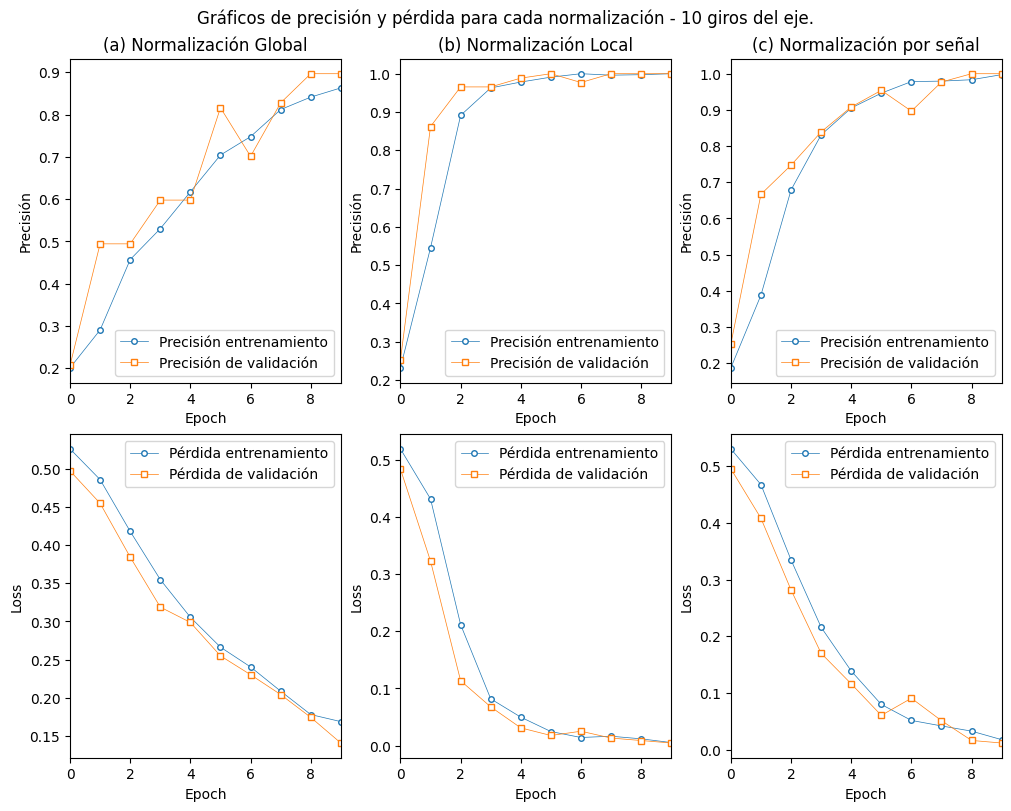

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10, 8), constrained_layout=True)

# Llamar función para cada modelo y asignar resultado al eje correspondiente
grafico_precision_pormodelo('GLOBAL-10giros-16384_iter_4',ax1)
grafico_precision_pormodelo('LOCAL-10giros-16384_iter_8',ax2)
grafico_precision_pormodelo('SENAL-10giros-16384_iter_2',ax3)
grafico_perdida_pormodelo('GLOBAL-10giros-16384_iter_4',ax4)
grafico_perdida_pormodelo('LOCAL-10giros-16384_iter_8',ax5)
grafico_perdida_pormodelo('SENAL-10giros-16384_iter_2',ax6)
ax1.set_title('(a) Normalización Global')
ax2.set_title('(b) Normalización Local')
ax3.set_title('(c) Normalización por señal')

ax1.set_ylabel('Precisión')
ax1.set_xlabel('Epoch')
ax2.set_ylabel('Precisión')
ax2.set_xlabel('Epoch')
ax3.set_ylabel('Precisión')
ax3.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.set_xlabel('Epoch')
ax5.set_ylabel('Loss')
ax5.set_xlabel('Epoch')
ax6.set_ylabel('Loss')
ax6.set_xlabel('Epoch')

# Guardar y mostrar figura
fig.suptitle('Gráficos de precisión y pérdida para cada normalización - 10 giros del eje.', fontsize=12)
plt.savefig('resultados-cnn/imagenes/accuracy/precision_por_modelo.png', dpi =1600)
plt.show()

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_matriz_confusion(name, model,x_test,y_test,ax):
    # Obtener las predicciones del modelo en el conjunto de prueba
    y_pred = np.argmax(model.predict(x_test), axis=-1)

        # Obtener la matriz de confusión
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

    # Plotear la matriz de confusión
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['H', 'I', 'O', 'B', 'C'], yticklabels=['H', 'I', 'O', 'B', 'C'], ax = ax)

    # Guardar la imagen con una etiqueta
    plt.savefig('resultados-cnn/imagenes/matriz_confusion/confusion_matrix_{}.png'.format(name))


7/7 [==============================] - 0s 6ms/step


C:\Users\Cristian\AppData\Local\Temp\ipykernel_4432\1615756932.py:20: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=2)


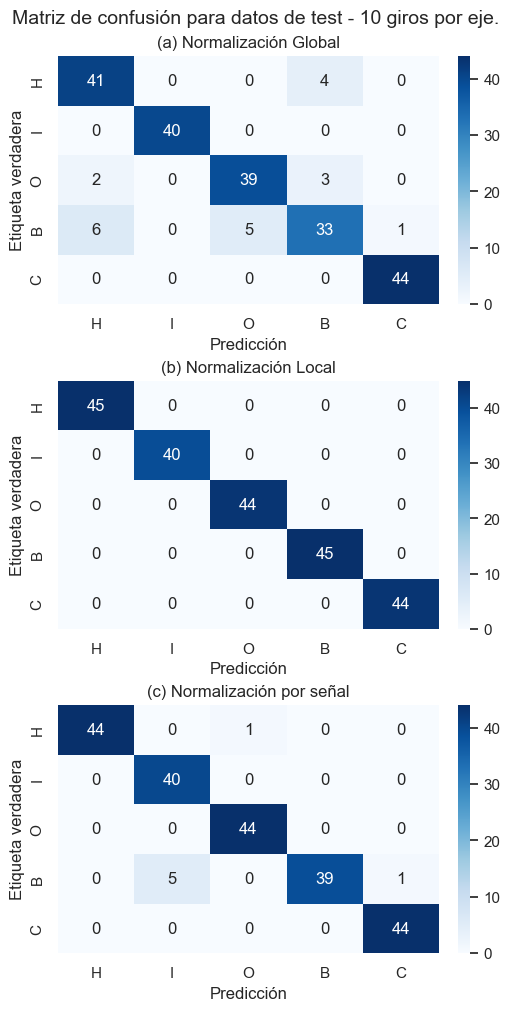

In [265]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(5, 10), constrained_layout=True)

# Llamar función para cada modelo y asignar resultado al eje correspondiente
plot_matriz_confusion('Normalización Global', model_1,x_test_1,y_test_1,ax1)
plot_matriz_confusion('Normalización Local', model_2,x_test_2,y_test_2,ax2)
plot_matriz_confusion('Normalización por Señal', model_3,x_test_3,y_test_3,ax3)
ax1.set_title('(a) Normalización Global')
ax2.set_title('(b) Normalización Local')
ax3.set_title('(c) Normalización por señal')

ax1.set_ylabel('Etiqueta verdadera')
ax1.set_xlabel('Predicción')
ax2.set_ylabel('Etiqueta verdadera')
ax2.set_xlabel('Predicción')
ax3.set_ylabel('Etiqueta verdadera')
ax3.set_xlabel('Predicción')

# Ajustar espacio entre subplots
fig.suptitle('Matriz de confusión para datos de test - 10 giros por eje.', fontsize=14)
fig.subplots_adjust(wspace=2)

# Guardar y mostrar figura
plt.savefig('resultados-cnn/imagenes/matriz_confusion/m_conf_por_modelo.png', dpi=300)
plt.show()

In [57]:
#Mejores modelos
model_1, hist_1 = cargar_modelo_y_historial('GLOBAL-10giros-16384_iter_4')
model_2, hist_2 = cargar_modelo_y_historial('LOCAL-10giros-16384_iter_8')
model_3, hist_3 = cargar_modelo_y_historial('SENAL-10giros-16384_iter_2')

In [71]:
from sklearn.metrics import classification_report
import numpy as np

# Cargar modelo

# Predecir clases para los datos de test
y_pred = model_1.predict(x_test_1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generar reporte de clasificación
target_names = ['Normal - N', 'Falla pista interna - I', 'Falla pista externa - O','Falla en rodamiento - B','Falla combinada - C']
print(classification_report(y_test_1.argmax(axis=1), y_pred_classes, target_names=target_names))

# Calcular las métricas del modelo
metrics = model_1.evaluate(x_test_1, y_test_1)
print('Métricas del modelo:', metrics)

from sklearn.metrics import classification_report, accuracy_score

# Calcular el accuracy de cada clase
accuracy_by_class = accuracy_score(y_test_1.argmax(axis=1), y_pred_classes)
print('Accuracy por clase:', accuracy_by_class)



7/7 [==============================] - 0s 51ms/step
                         precision    recall  f1-score   support

             Normal - N       0.84      0.91      0.87        45
Falla pista interna - I       1.00      1.00      1.00        40
Falla pista externa - O       0.89      0.89      0.89        44
Falla en rodamiento - B       0.82      0.73      0.78        45
    Falla combinada - C       0.98      1.00      0.99        44

               accuracy                           0.90       218
              macro avg       0.91      0.91      0.90       218
           weighted avg       0.90      0.90      0.90       218

7/7 [==============================] - 0s 7ms/step - loss: 0.1316 - accuracy: 0.9037
Métricas del modelo: [0.13159462809562683, 0.9036697149276733]
Accuracy por clase: 0.9036697247706422


In [69]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, support = precision_recall_fscore_support(y_test_1.argmax(axis=1), y_pred_classes)

for i in range(len(target_names)):
    print(target_names[i])
    print("Precision: ", precision[i])
    print("Recall: ", recall[i])
    print("F1-score: ", f1_score[i])
    print("Support: ", support[i])

Normal - N
Precision:  0.8367346938775511
Recall:  0.9111111111111111
F1-score:  0.8723404255319148
Support:  45
Falla pista interna - I
Precision:  1.0
Recall:  1.0
F1-score:  1.0
Support:  40
Falla pista externa - O
Precision:  0.8863636363636364
Recall:  0.8863636363636364
F1-score:  0.8863636363636365
Support:  44
Falla en rodamiento - B
Precision:  0.825
Recall:  0.7333333333333333
F1-score:  0.776470588235294
Support:  45
Falla combinada - C
Precision:  0.9777777777777777
Recall:  1.0
F1-score:  0.9887640449438202
Support:  44


In [ ]:
# % de test.

In [66]:
def print_test_scores(name,model,x_test,y_test):
    score = model.evaluate(x_test, y_test)
    print('Modelo: ', name)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return score

In [67]:
#Valores para test
score_1 = print_test_scores('STFT-GLOBAL-10g', model_1,x_test_1,y_test_1)
score_2 = print_test_scores('STFT-LOCAL-10g', model_2,x_test_2,y_test_2)
score_3 = print_test_scores('STFT-SENAL-10g', model_3,x_test_3,y_test_3)

7/7 [==============================] - 0s 13ms/step - loss: 0.1316 - accuracy: 0.9037
Modelo:  STFT-GLOBAL-2seg
Test loss: 0.13159462809562683
Test accuracy: 0.9036697149276733
7/7 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000
Modelo:  STFT-LOCAL-2seg
Test loss: 0.0023854330647736788
Test accuracy: 1.0
7/7 [==============================] - 0s 7ms/step - loss: 0.0248 - accuracy: 0.9679
Modelo:  STFT-SENAL-2seg
Test loss: 0.024819334968924522
Test accuracy: 0.9678899049758911


In [57]:
#Mejores modelos
model_1, hist_1 = cargar_modelo_y_historial('GLOBAL-10giros-16384_iter_4')
model_2, hist_2 = cargar_modelo_y_historial('LOCAL-10giros-16384_iter_8')
model_3, hist_3 = cargar_modelo_y_historial('SENAL-10giros-16384_iter_2')

## Resultados 2 - Plots.

In [40]:
def plot_precision_promedio_2(acc_promedio, val_promedio, nombre_modelo, dur_señal):
    barWidth = 0.4
    fig, ax = plt.subplots(figsize=(6, 4))

    br1 = np.arange(len(acc_promedio))
    br2 = [x + barWidth for x in br1]

    plt.bar(br1, acc_promedio, color='r', width=barWidth, edgecolor='grey', label='Entrenamiento')
    plt.bar(br2, val_promedio, color='b', width=barWidth, edgecolor='grey', label='Validación')

    ax.set_title(f'Precisión promedio', fontsize=12)
    ax.set_title(f'Duración señal: ' + dur_señal + ' / epoch = 10 / batch = 32 / iteraciones = 10.', fontsize=10)
    ax.set_ylabel('Precisión promedio %', fontsize=10)
    ax.set_xlabel('Ancho de ventana', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    plt.xticks([r + barWidth / 2 for r in range(len(acc_promedio))],
               ['4096', '8192', '16384', '32768'], rotation=0, fontsize=9)
    y_max = max(max(acc_promedio), max(val_promedio)) + 20
    plt.ylim([0, y_max])

    # Mover leyenda afuera a la izquierda
    plt.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1.35, 1))

    for i, acc in enumerate(acc_promedio):
        plt.text(x=br1[i] - 0.15, y=acc + 1, s=f"{acc:.1f}%", size=8)
    for i, val in enumerate(val_promedio):
        plt.text(x=br2[i] - 0.15, y=val + 1, s=f"{val:.1f}%", size=8)

    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2) # Ajustar área de trazado

    plt.savefig('resultados-cnn/imagenes/acc_barras/' + nombre_modelo + '_accuracy.png', dpi=300, bbox_inches='tight')

    plt.show()


In [46]:

accuracy_train_1, val_train_1, ac_lista_1, val_lista_1 = calcular_promedio_porcentaje('r2-4096-GLOBAL_iter')
accuracy_train_2, val_train_2, ac_lista_2, val_lista_2 = calcular_promedio_porcentaje('r2-8192-GLOBAL_iter')
accuracy_train_3, val_train_3, ac_lista_3, val_lista_3 = calcular_promedio_porcentaje('GLOBAL-10giros-16384_iter')
accuracy_train_4, val_train_4,ac_lista_4, val_lista_4 = calcular_promedio_porcentaje('r2-32768-GLOBAL_iter')

accuracy_train_5, val_train_5, ac_lista_5, val_lista_5 = calcular_promedio_porcentaje('r2-4096-LOCAL_iter')
accuracy_train_6, val_train_6, ac_lista_6, val_lista_6= calcular_promedio_porcentaje('r2-8192-LOCAL_iter')
accuracy_train_7, val_train_7, ac_lista_7, val_lista_7 = calcular_promedio_porcentaje('LOCAL-10giros-16384_iter')
accuracy_train_8, val_train_8, ac_lista_8, val_lista_8 = calcular_promedio_porcentaje('r2-32768-LOCAL_iter')

accuracy_train_9, val_train_9, ac_lista_9, val_lista_9 = calcular_promedio_porcentaje('r2-4096-SENAL_iter')
accuracy_train_10, val_train_10, ac_lista_10, val_lista_10 = calcular_promedio_porcentaje('r2-8192-SENAL_iter')
accuracy_train_11, val_train_11, ac_lista_11, val_lista_11 = calcular_promedio_porcentaje('SENAL-10giros-16384_iter')
accuracy_train_12, val_train_12, ac_lista_12, val_lista_12 = calcular_promedio_porcentaje('r2-32768-SENAL_iter')

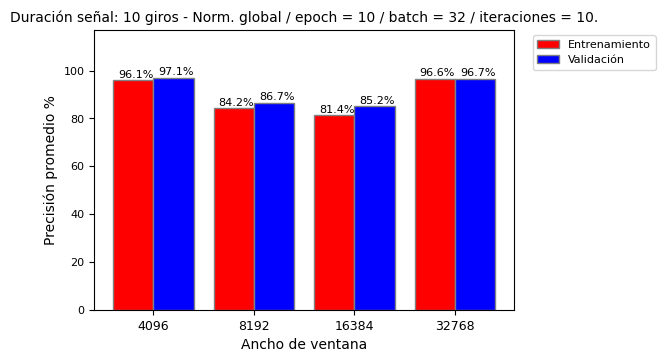

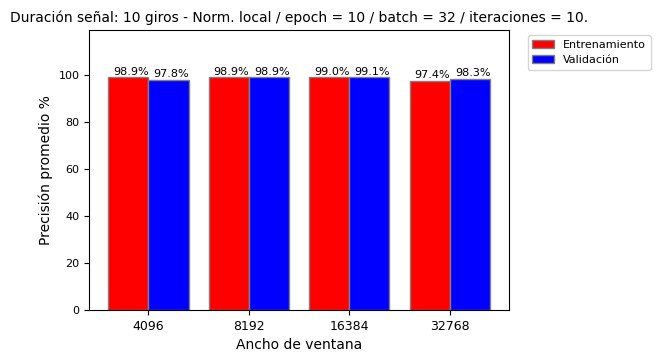

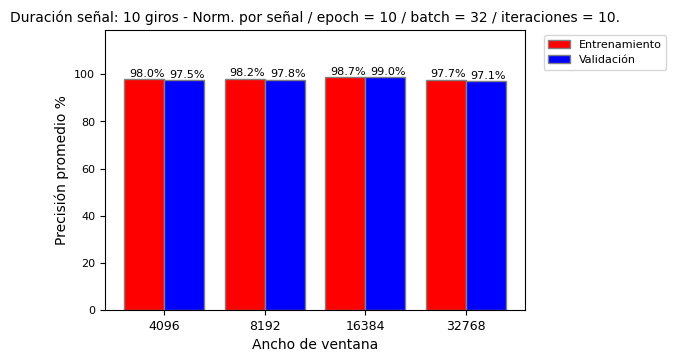

In [47]:
acc_promedio_1 = [accuracy_train_1, accuracy_train_2,accuracy_train_3,accuracy_train_4]
val_promedio_1 = [val_train_1, val_train_2, val_train_3, val_train_4]

acc_promedio_2 = [accuracy_train_5, accuracy_train_6,accuracy_train_7,accuracy_train_8]
val_promedio_2 = [val_train_5, val_train_6, val_train_7,val_train_8]

acc_promedio_3 = [accuracy_train_9, accuracy_train_10,accuracy_train_11,accuracy_train_12]
val_promedio_3 = [val_train_9, val_train_10, val_train_11,val_train_12]

#Plot
plot_precision_promedio_2(acc_promedio_1, val_promedio_1, dur_señal = '10 giros - Norm. global', nombre_modelo='GLOBAL_PROM')
plot_precision_promedio_2(acc_promedio_2, val_promedio_2, dur_señal = '10 giros - Norm. local', nombre_modelo='LOCAL_PROM')
plot_precision_promedio_2(acc_promedio_3, val_promedio_3, dur_señal = '10 giros - Norm. por señal', nombre_modelo='SENAL_PROM')

## Mejores resultados para Local - 16384 - 10 giros del eje.

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_matriz_confusion(name, model,x_test,y_test):
    # Obtener las predicciones del modelo en el conjunto de prueba
    y_pred = np.argmax(model.predict(x_test), axis=-1)

        # Obtener la matriz de confusión
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

    # Plotear la matriz de confusión
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['H', 'I', 'O', 'B', 'C'], yticklabels=['H', 'I', 'O', 'B', 'C'])
    plt.title('Normalización local - Nw = 16384 - Dur. señal: 10 giros del eje')
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Predicción')
    # Guardar la imagen con una etiqueta
    plt.savefig('resultados-cnn/imagenes/matriz_confusion/confusion_matrix_{}.png'.format(name))


In [41]:
model_best, hist_best = cargar_modelo_y_historial('LOCAL-10giros-16384_iter_8')

7/7 [==============================] - 0s 52ms/step


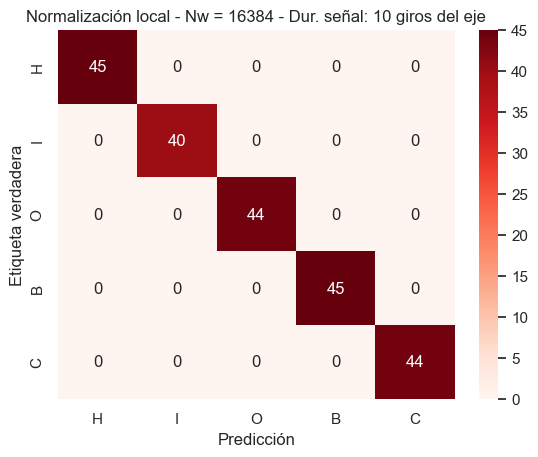

In [42]:
#Plot matriz confusion
plot_matriz_confusion('Normalización Local best model', model_best,x_test_2,y_test_2)

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_matriz_confusion(name, model,x_test,y_test,ax):
    # Obtener las predicciones del modelo en el conjunto de prueba
    y_pred = np.argmax(model.predict(x_test), axis=-1)

        # Obtener la matriz de confusión
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

    # Plotear la matriz de confusión
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['H', 'I', 'O', 'B', 'C'], yticklabels=['H', 'I', 'O', 'B', 'C'], ax = ax)

    # Guardar la imagen con una etiqueta
    plt.savefig('resultados-cnn/imagenes/matriz_confusion/confusion_matrix_{}.png'.format(name))


In [43]:
from sklearn.metrics import classification_report
import numpy as np

# Cargar modelo

# Predecir clases para los datos de test
y_pred = model_best.predict(x_test_2)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generar reporte de clasificación
target_names = ['Normal - N', 'Falla pista interna - I', 'Falla pista externa - O','Falla en rodamiento - B','Falla combinada - C']
print(classification_report(y_test_2.argmax(axis=1), y_pred_classes, target_names=target_names))

# Calcular las métricas del modelo
metrics = model_1.evaluate(x_test_2, y_test_2)
print('Métricas del modelo:', metrics)

from sklearn.metrics import classification_report, accuracy_score

# Calcular el accuracy de cada clase
accuracy_by_class = accuracy_score(y_test_2.argmax(axis=1), y_pred_classes)
print('Accuracy por clase:', accuracy_by_class)

7/7 [==============================] - 0s 68ms/step
                         precision    recall  f1-score   support

             Normal - N       1.00      1.00      1.00        45
Falla pista interna - I       1.00      1.00      1.00        40
Falla pista externa - O       1.00      1.00      1.00        44
Falla en rodamiento - B       1.00      1.00      1.00        45
    Falla combinada - C       1.00      1.00      1.00        44

               accuracy                           1.00       218
              macro avg       1.00      1.00      1.00       218
           weighted avg       1.00      1.00      1.00       218



NameError: name 'model_1' is not defined

In [43]:
def print_test_scores(name,model,x_test,y_test):
    score = model.evaluate(x_test, y_test)
    print('Modelo: ', name)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return score

In [23]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 512)               1

### Resultados Transfer-learning


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import join
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import glob

In [2]:
from tensorflow.keras.models import load_model
def cargar_modelo_y_historial(nombre_modelo):
    carpeta_modelos = "resultados-transfer/"
    carpeta_history = "resultados-transfer/"
    
    # Cargar modelo
    ruta_modelo = os.path.join(carpeta_modelos, nombre_modelo + ".h5")
    model = load_model(ruta_modelo)
    
    # Cargar historial
    ruta_historial = os.path.join(carpeta_history, nombre_modelo + ".csv")
    hist = pd.read_csv(ruta_historial)
    
    return model, hist

In [3]:

model_3giros, hist_3giros = cargar_modelo_y_historial('resultados-transfer_3giros_70test_30train')
model_10giros, hist_10giros = cargar_modelo_y_historial('resultados-transfer_caso1_train30_test70')


In [4]:
#Función gráfico precision

def grafico_precision_pormodelo(nombre_modelo, ax):
    # Cargar datos del historial
    hist_df = pd.read_csv('resultados-transfer/' + nombre_modelo + '.csv')

    # Crear figura y subplots
    ax.plot(hist_df['accuracy'], linewidth=0.5, marker = 'o', mfc = 'w', ms='4', label='Precisión entrenamiento')
    ax.plot(hist_df['val_accuracy'], linewidth=0.5, marker = 's', mfc = 'w', ms='4', label='Precisión de validación')
    ax.legend(loc='lower right', fontsize=10)

    # Ajustar límites del eje x
    ax.set_xlim(0, len(hist_df)-1)

    # Guardar gráfico
    plt.savefig('resultados-transfer/imagenes/' + nombre_modelo + '_accuracy.png')


In [5]:
def grafico_perdida_pormodelo(nombre_modelo, ax):
    # Cargar datos del historial
    hist_df = pd.read_csv('resultados-transfer/' + nombre_modelo + '.csv')

    # Crear figura y subplots
    ax.plot(hist_df['loss'], linewidth=0.5, marker = 'o', mfc = 'w', ms='4', label='Pérdida entrenamiento')
    ax.plot(hist_df['val_loss'], linewidth=0.5, marker = 's', mfc = 'w', ms='4', label='Pérdida de validación')
    ax.legend(loc='upper right', fontsize=10)

    # Ajustar límites del eje x
    ax.set_xlim(0, len(hist_df)-1)

    # Guardar gráfico
    plt.savefig('resultados-transfer/imagenes/' + nombre_modelo + '_perdida.png')

In [187]:
#Plots de accuraccy
grafico_precision_pormodelo('resultados-transfer_3giros_70test_30train',ax1)
grafico_precision_pormodelo('resultados-transfer_caso1_train30_test70',ax2)

<Figure size 640x480 with 0 Axes>

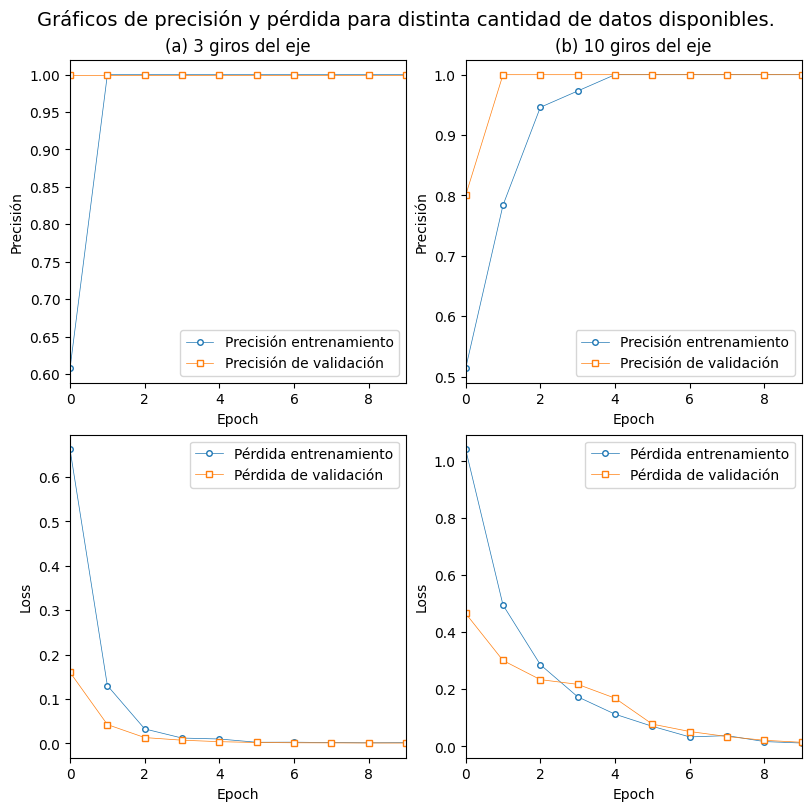

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)

# Llamar función para cada modelo y asignar resultado al eje correspondiente
grafico_precision_pormodelo('resultados-transfer_3giros_70test_30train',ax1)
grafico_precision_pormodelo('resultados-transfer_caso1_train30_test70',ax2)

grafico_perdida_pormodelo('resultados-transfer_3giros_70test_30train',ax3)
grafico_perdida_pormodelo('resultados-transfer_caso1_train30_test70',ax4)

ax1.set_title('(a) 3 giros del eje')
ax2.set_title('(b) 10 giros del eje')


ax1.set_ylabel('Precisión')
ax1.set_xlabel('Epoch')
ax2.set_ylabel('Precisión')
ax2.set_xlabel('Epoch')

ax3.set_ylabel('Loss')
ax3.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.set_xlabel('Epoch')


# Guardar y mostrar figura
fig.suptitle('Gráficos de precisión y pérdida para distinta cantidad de datos disponibles.', fontsize=14)
plt.savefig('resultados-transfer/imagenes/precision_por_modelo_transfer.png', dpi =1600)
plt.show()

# Matriz de confusión para 3 y 10 giros del eje

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_matriz_confusion(name, model,x_test,y_test,ax,color):
    # Obtener las predicciones del modelo en el conjunto de prueba
    y_pred = np.argmax(model.predict(x_test), axis=-1)

        # Obtener la matriz de confusión
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

    # Plotear la matriz de confusión
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, cmap=color, fmt='g', xticklabels=['H', 'I', 'O'], yticklabels=['H', 'I', 'O'], ax = ax)

    # Guardar la imagen con una etiqueta
    plt.savefig('resultados-transfer/imagenes/confusion_matrix_{}.png'.format(name))


In [17]:
from tensorflow.keras.models import load_model
def cargar_modelo_y_historial(nombre_modelo):
    carpeta_modelos = "resultados-transfer/"
    carpeta_history = "resultados-transfer/"
    
    # Cargar modelo
    ruta_modelo = os.path.join(carpeta_modelos, nombre_modelo + ".h5")
    model = load_model(ruta_modelo)
    
    # Cargar historial
    ruta_historial = os.path.join(carpeta_history, nombre_modelo + ".csv")
    hist = pd.read_csv(ruta_historial)
    
    return model, hist

In [21]:

def prepros_bancoimagenes(mydir, test_size, val_size):
    #Lectura en array de imagenes, preprocesamiento a grises y reescalamiento a 128x128
    X = [] 
    for name in listdir(mydir) :
        path = join( mydir,name) 
        data = Image.open(path).convert('L')
        data = data.resize((128,128))
        data = np.array(data)
        X.append(data) 
    X = np.array(X) 
    print(X.shape) 

    y =[]
    for name in listdir(mydir) :
        path = join( mydir,name) 
        if name[0] == 'n':
            y.append(0)
        if name[0] == 'i':
            y.append(1)
        if name[0] == 'o':
            y.append(2)
    y = np.array(y) 
    print(y.shape) 
    
    # Dividir datos de test y entrenamiento.
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    
    #Dividir los datos de train en entrenamiento y validación.
    x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=42, stratify = y_train)
    
    #Normalización
    x_train = x_train.astype("float32") / 255
    x_val= x_val.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    
    #Agregar dimensión extra
    x_train = np.expand_dims(x_train, -1) 
    x_val = np.expand_dims(x_val, -1) 
    x_test = np.expand_dims(x_test, -1) 
    
    #One hot encoder
    y_train = keras.utils.to_categorical(y_train, 3)
    y_val = keras.utils.to_categorical(y_val, 3)
    y_test = keras.utils.to_categorical(y_test, 3)

    return x_train, x_test, x_val, y_train, y_test, y_val

In [31]:
mydir = r"banco_mfpt/banco_transfer_mfpt_3giros"
mydir2 = r"banco_mfpt/banco_transfer_mfpt_10giros"
test_size = 0.7
val_size = 0.1


In [32]:
x_train, x_test, x_val, y_train, y_test, y_val = prepros_bancoimagenes(mydir, test_size, val_size)

(500, 128, 128)
(500,)


In [33]:
x_train2, x_test2, x_val2, y_train2, y_test2, y_val2 = prepros_bancoimagenes(mydir2, 0.7, 0.1)

(143, 128, 128)
(143,)


4/4 [==============================] - 0s 7ms/step


C:\Users\Cristian\AppData\Local\Temp\ipykernel_16508\1849144223.py:19: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.5)


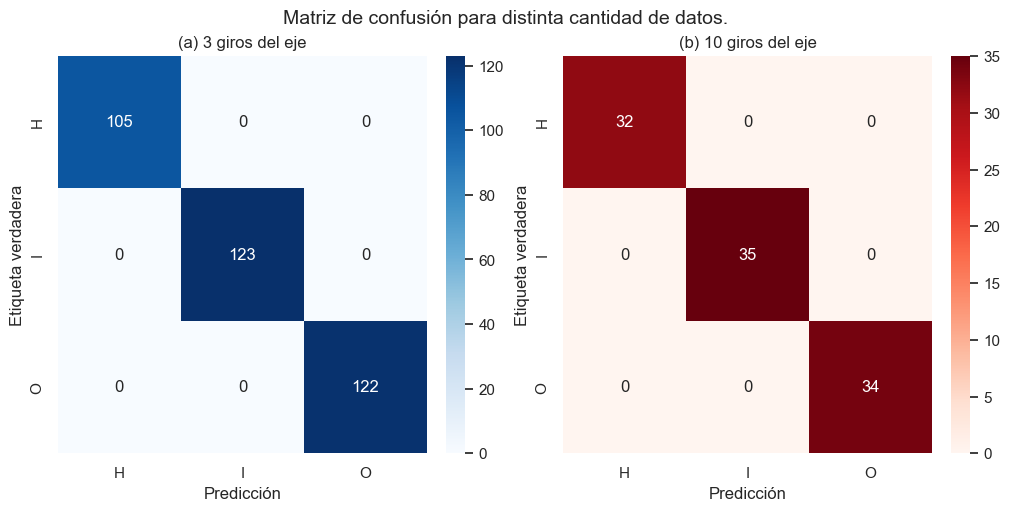

In [34]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Llamar función para cada modelo y asignar resultado al eje correspondiente
plot_matriz_confusion('3 giros del eje', model_3giros, x_test, y_test, ax1, 'Blues')
plot_matriz_confusion('10 giros del eje', model_10giros, x_test2, y_test2, ax2, 'Reds')

ax1.set_title('(a) 3 giros del eje')
ax2.set_title('(b) 10 giros del eje')

ax1.set_ylabel('Etiqueta verdadera')
ax1.set_xlabel('Predicción')
ax2.set_ylabel('Etiqueta verdadera')
ax2.set_xlabel('Predicción')

# Ajustar espacio entre subplots
fig.suptitle('Matriz de confusión para distinta cantidad de datos.', fontsize=14)
fig.subplots_adjust(wspace=0.5)

# Guardar y mostrar figura
plt.savefig('resultados-transfer/imagenes/m_conf_tl.png', dpi=300)
plt.show()


### Resultados desde cero para comparar con Transfer-learning


In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import join
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
import pandas as pd
import glob

In [8]:
from tensorflow.keras.models import load_model
def cargar_modelo_y_historial(nombre_modelo):
    carpeta_modelos = "resultados-transfer/"
    carpeta_history = "resultados-transfer/"
    
    # Cargar modelo
    ruta_modelo = os.path.join(carpeta_modelos, nombre_modelo + ".h5")
    model = load_model(ruta_modelo)
    
    # Cargar historial
    ruta_historial = os.path.join(carpeta_history, nombre_modelo + ".csv")
    hist = pd.read_csv(ruta_historial)
    
    return model, hist

In [9]:

model_3giros_cero, hist_3giros_cero = cargar_modelo_y_historial('resultados-cero_3giros_train30_test70')
model_10giros_cero, hist_10giros_cero = cargar_modelo_y_historial('resultados-cero_caso1_train30_test70')


In [10]:
#Función gráfico precision

def grafico_precision_pormodelo(nombre_modelo, ax):
    # Cargar datos del historial
    hist_df = pd.read_csv('resultados-transfer/' + nombre_modelo + '.csv')

    # Crear figura y subplots
    ax.plot(hist_df['accuracy'], linewidth=0.5, marker = 'o', mfc = 'w', ms='4', label='Precisión entrenamiento')
    ax.plot(hist_df['val_accuracy'], linewidth=0.5, marker = 's', mfc = 'w', ms='4', label='Precisión de validación')
    ax.legend(loc='lower right', fontsize=10)

    # Ajustar límites del eje x
    ax.set_xlim(0, len(hist_df)-1)

    # Guardar gráfico
    plt.savefig('resultados-transfer/imagenes/' + nombre_modelo + '_accuracy.png')


In [11]:
def grafico_perdida_pormodelo(nombre_modelo, ax):
    # Cargar datos del historial
    hist_df = pd.read_csv('resultados-transfer/' + nombre_modelo + '.csv')

    # Crear figura y subplots
    ax.plot(hist_df['loss'], linewidth=0.5, marker = 'o', mfc = 'w', ms='4', label='Pérdida entrenamiento')
    ax.plot(hist_df['val_loss'], linewidth=0.5, marker = 's', mfc = 'w', ms='4', label='Pérdida de validación')
    ax.legend(loc='upper right', fontsize=10)

    # Ajustar límites del eje x
    ax.set_xlim(0, len(hist_df)-1)

    # Guardar gráfico
    plt.savefig('resultados-transfer/imagenes/' + nombre_modelo + '_perdida.png')

In [9]:
#Plots de accuraccy
grafico_precision_pormodelo('resultados-cero_3giros_train30_test70',ax1)
grafico_precision_pormodelo('resultados-cero_caso1_train30_test70',ax2)

NameError: name 'ax1' is not defined

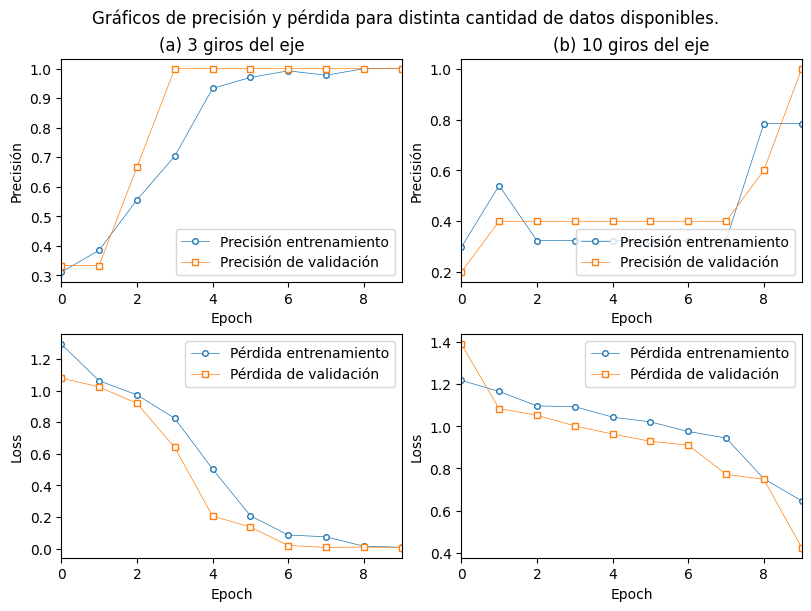

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)

# Llamar función para cada modelo y asignar resultado al eje correspondiente
grafico_precision_pormodelo('resultados-cero_3giros_train30_test70',ax1)
grafico_precision_pormodelo('resultados-cero_caso1_train30_test70',ax2)

grafico_perdida_pormodelo('resultados-cero_3giros_train30_test70',ax3)
grafico_perdida_pormodelo('resultados-cero_caso1_train30_test70',ax4)

ax1.set_title('(a) 3 giros del eje')
ax2.set_title('(b) 10 giros del eje')


ax1.set_ylabel('Precisión')
ax1.set_xlabel('Epoch')
ax2.set_ylabel('Precisión')
ax2.set_xlabel('Epoch')

ax3.set_ylabel('Loss')
ax3.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.set_xlabel('Epoch')


# Guardar y mostrar figura
fig.suptitle('Gráficos de precisión y pérdida para distinta cantidad de datos disponibles.', fontsize=12)
plt.savefig('resultados-transfer/imagenes/precision_por_modelo_desde0.png', dpi =1600)
plt.show()

# Matriz de confusión para 3 y 10 giros del eje desde 0

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_matriz_confusion(name, model,x_test,y_test,ax,color):
    # Obtener las predicciones del modelo en el conjunto de prueba
    y_pred = np.argmax(model.predict(x_test), axis=-1)

        # Obtener la matriz de confusión
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

    # Plotear la matriz de confusión
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, cmap=color, fmt='g', xticklabels=['H', 'I', 'O'], yticklabels=['H', 'I', 'O'], ax = ax)

    # Guardar la imagen con una etiqueta
    plt.savefig('resultados-transfer/imagenes/confusion_matrix_{}.png'.format(name))


In [13]:
from tensorflow.keras.models import load_model
def cargar_modelo_y_historial(nombre_modelo):
    carpeta_modelos = "resultados-transfer/"
    carpeta_history = "resultados-transfer/"
    
    # Cargar modelo
    ruta_modelo = os.path.join(carpeta_modelos, nombre_modelo + ".h5")
    model = load_model(ruta_modelo)
    
    # Cargar historial
    ruta_historial = os.path.join(carpeta_history, nombre_modelo + ".csv")
    hist = pd.read_csv(ruta_historial)
    
    return model, hist

In [14]:

def prepros_bancoimagenes(mydir, test_size, val_size):
    #Lectura en array de imagenes, preprocesamiento a grises y reescalamiento a 128x128
    X = [] 
    for name in listdir(mydir) :
        path = join( mydir,name) 
        data = Image.open(path).convert('L')
        data = data.resize((128,128))
        data = np.array(data)
        X.append(data) 
    X = np.array(X) 
    print(X.shape) 

    y =[]
    for name in listdir(mydir) :
        path = join( mydir,name) 
        if name[0] == 'n':
            y.append(0)
        if name[0] == 'i':
            y.append(1)
        if name[0] == 'o':
            y.append(2)
    y = np.array(y) 
    print(y.shape) 
    
    # Dividir datos de test y entrenamiento.
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify = y)
    
    #Dividir los datos de train en entrenamiento y validación.
    x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=42, stratify = y_train)
    
    #Normalización
    x_train = x_train.astype("float32") / 255
    x_val= x_val.astype("float32") / 255
    x_test = x_test.astype("float32") / 255
    
    #Agregar dimensión extra
    x_train = np.expand_dims(x_train, -1) 
    x_val = np.expand_dims(x_val, -1) 
    x_test = np.expand_dims(x_test, -1) 
    
    #One hot encoder
    y_train = keras.utils.to_categorical(y_train, 3)
    y_val = keras.utils.to_categorical(y_val, 3)
    y_test = keras.utils.to_categorical(y_test, 3)

    return x_train, x_test, x_val, y_train, y_test, y_val

In [15]:
mydir = r"banco_mfpt/banco_transfer_mfpt_3giros"
mydir2 = r"banco_mfpt/banco_transfer_mfpt_10giros"
test_size = 0.7
val_size = 0.1


In [16]:
x_train, x_test, x_val, y_train, y_test, y_val = prepros_bancoimagenes(mydir, test_size, val_size)

(500, 128, 128)
(500,)


In [17]:
x_train2, x_test2, x_val2, y_train2, y_test2, y_val2 = prepros_bancoimagenes(mydir2, 0.7, 0.1)

(143, 128, 128)
(143,)


4/4 [==============================] - 0s 21ms/step


C:\Users\Cristian\AppData\Local\Temp\ipykernel_19788\2230245766.py:19: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.5)


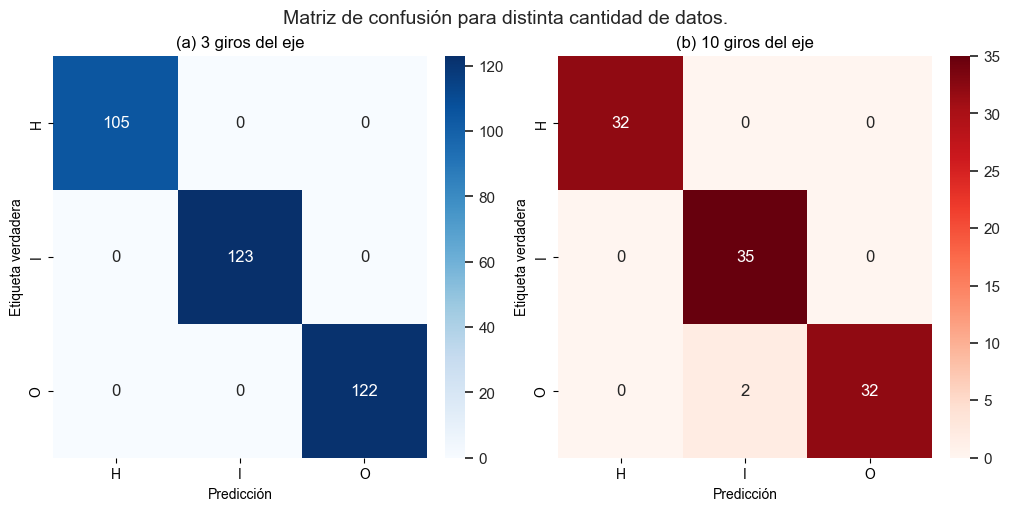

In [18]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Llamar función para cada modelo y asignar resultado al eje correspondiente
plot_matriz_confusion('3 giros del eje', model_3giros_cero, x_test, y_test, ax1, 'Blues')
plot_matriz_confusion('10 giros del eje', model_10giros_cero, x_test2, y_test2, ax2, 'Reds')

ax1.set_title('(a) 3 giros del eje')
ax2.set_title('(b) 10 giros del eje')

ax1.set_ylabel('Etiqueta verdadera')
ax1.set_xlabel('Predicción')
ax2.set_ylabel('Etiqueta verdadera')
ax2.set_xlabel('Predicción')

# Ajustar espacio entre subplots
fig.suptitle('Matriz de confusión para distinta cantidad de datos.', fontsize=14)
fig.subplots_adjust(wspace=0.5)

# Guardar y mostrar figura
plt.savefig('resultados-transfer/imagenes/m_conf_desde0.png', dpi=300)
plt.show()


## STD, MAX Y MIN DESPUES DE 10 ITERACIONES PARA DESDE 0 Y TRANSFER LEARNING


In [19]:
import glob
import os
import pandas as pd
import numpy as np

def calcular_promedio_porcentaje(nombre_base):
    archivos_csv = glob.glob(os.path.join('resultados-transfer/iteraciones', nombre_base + '*.csv'))
    promedio_accuracy = 0
    promedio_val_accuracy = 0
    accuracy_lista = []
    val_accuracy_lista = []
    
    for archivo in archivos_csv:
        df = pd.read_csv(archivo)
        ultimo_index = df.index[-1]
        # Encuentra el último valor en la epoch 10 y los suma para luego dividir por la cantidad de archivos presentes.
        promedio_accuracy += df.loc[ultimo_index, 'accuracy']
        promedio_val_accuracy += df.loc[ultimo_index, 'val_accuracy']
        # Agregar accuracy de prom y val a las listas para determinar el mejor modelo.
        accuracy_lista.append(df.loc[ultimo_index, 'accuracy'])
        val_accuracy_lista.append(df.loc[ultimo_index, 'val_accuracy'])
    
    promedio_accuracy = promedio_accuracy / len(archivos_csv)
    promedio_val_accuracy = promedio_val_accuracy / len(archivos_csv)
    
    promedio_accuracy *= 100
    promedio_val_accuracy *= 100

    desviacion_accuracy = np.std(accuracy_lista) * 100
    desviacion_val_accuracy = np.std(val_accuracy_lista) * 100
    
    max_accuracy = np.max(accuracy_lista) * 100
    max_val_accuracy = np.max(val_accuracy_lista) * 100
    
    min_accuracy = np.min(accuracy_lista) * 100
    min_val_accuracy = np.min(val_accuracy_lista) * 100
    
    return promedio_accuracy, promedio_val_accuracy, desviacion_accuracy, desviacion_val_accuracy, max_accuracy, max_val_accuracy, min_accuracy, min_val_accuracy


In [29]:
prom_presicion_1, prom_test_1, std_presicion_1, std_test_1, max_train_1, max_test_1, min_train_1, min_test_1 = calcular_promedio_porcentaje('desde0_3giros_iter')
prom_presicion_2, prom_test_2, std_presicion_2, std_test_2, max_train_2, max_test_2, min_train_2, min_test_2 = calcular_promedio_porcentaje('desde0_10giros_iter')

prom_presicion_3, prom_test_3, std_presicion_3, std_test_3, max_train_3, max_test_3, min_train_3, min_test_3 = calcular_promedio_porcentaje('transfer_3giros_iter')
prom_presicion_4, prom_test_4, std_presicion_4, std_test_4, max_train_4, max_test_4, min_train_4, min_test_4 = calcular_promedio_porcentaje('transfer_10giros_iter')



In [30]:
import pandas as pd

data = {
    'Tipo': ['Desde 0 - 3 giros', 'Desde 0 - 10 giros', 'Transfer - 3 giros', 'Transfer - 10 giros'],
    'Promedio Precisión Entrenamiento': [prom_presicion_1, prom_presicion_2, prom_presicion_3, prom_presicion_4],
    'Promedio Precisión Validación': [prom_test_1, prom_test_2, prom_test_3, prom_test_4],
    'Desviación Estándar Precisión Entrenamiento': [std_presicion_1, std_presicion_2, std_presicion_3, std_presicion_4],
    'Desviación Estándar Precisión Validación': [std_test_1, std_test_2, std_test_3, std_test_4],
    'Máximo Precisión Entrenamiento': [max_train_1, max_train_2, max_train_3, max_train_4],
    'Máximo Precisión Validación': [max_test_1, max_test_2, max_test_3, max_test_4],
    'Mínimo Precisión Entrenamiento': [min_train_1, min_train_2, min_train_3, min_train_4],
    'Mínimo Precisión Validación': [min_test_1, min_test_2, min_test_3, min_test_4]
}

prom_presicion_df = pd.DataFrame(data)


In [31]:
prom_presicion_df

,Tipo,Promedio Precisión Entrenamiento,Promedio Precisión Validación,Desviación Estándar Precisión Entrenamiento,Desviación Estándar Precisión Validación,Máximo Precisión Entrenamiento,Máximo Precisión Validación,Mínimo Precisión Entrenamiento,Mínimo Precisión Validación
0,Desde 0 - 3 giros,98.222222,98.628572,3.232211,2.212395,100.0,100.000000,91.111112,94.000000
1,Desde 0 - 10 giros,88.108108,84.851486,11.542788,12.516435,100.0,97.029704,64.864862,66.336632
2,Transfer - 3 giros,100.000000,100.000000,0.000000,0.000000,100.0,100.000000,100.000000,100.000000
3,Transfer - 10 giros,99.729730,97.425743,0.810810,1.990074,100.0,100.000000,97.297299,95.049506
